In [142]:
%reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# INPUTs
file = 'INPUT_gym_test.xlsx'

Squat_1RM = 130 #these are the training maxes for this cycle.
Bench_1RM = 105
Deadlift_1RM = 160

# load data for main lifts
xl = pd.ExcelFile(file)

sheets = ['Squat','Bench','Deadlift','Lower Body Acc','Upper Body Acc']

df1 = xl.parse(sheets[0])
df1 = df1.values
Squat = df1

df1 = xl.parse(sheets[1])
df1 = df1.values
Bench = df1

df1 = xl.parse(sheets[2])
df1 = df1.values
Deadlift = df1

df1 = xl.parse(sheets[3])
df1 = df1.values
L_acc = df1[7:,:]

df1 = xl.parse(sheets[4])
df1 = df1.values
U_acc = df1[7:,:]

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


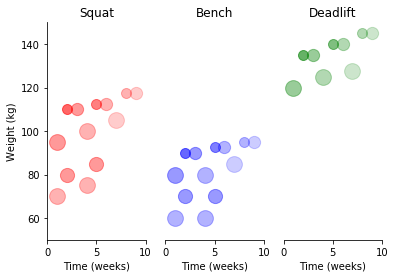

In [143]:
# VIS 1: Main plots
plt.close()

# a. Sets and reps over time
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Squat (there would probably be a better way to do this, but this way is quite flexible I guess)
no_week = (np.int64(round(max(Squat[:,0]))))+1 # define this for each movement incase some data is missing for eg.., bench
for i in range(1,no_week):
    idx = np.where(Squat[:,0] == i)
    dim = np.shape(idx)
    
    for j in range (0,dim[1]):
        c = idx[0][j]
        ax1.scatter(Squat[c,0],Squat[c,1],Squat[c,3]*50,color='r',alpha=Squat[c,2]/10) # plot the graph

# Bench
no_week = (np.int64(round(max(Bench[:,0]))))+1
for i in range(1,no_week):
    idx = np.where(Bench[:,0] == i)
    dim = np.shape(idx)
    
    for j in range (0,dim[1]):
        c = idx[0][j]
        ax2.scatter(Bench[c,0],Bench[c,1],Bench[c,3]*50,color='b',alpha=Bench[c,2]/10) # plot the graph

# Deadlift
no_week = (np.int64(round(max(Deadlift[:,0]))))+1
for i in range(1,no_week):
    idx = np.where(Deadlift[:,0] == i)
    dim = np.shape(idx)
    
    for j in range (0,dim[1]):
        c = idx[0][j]
        ax3.scatter(Deadlift[c,0],Deadlift[c,1],Deadlift[c,3]*50,color='g',alpha=Deadlift[c,2]/10) # plot the graph
        

# general plot properties
ax1.set_title('Squat')
ax1.set_xlim([0,10])
ax1.set_ylim([50,150])
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlabel('Time (weeks)')
ax1.set_ylabel('Weight (kg)')

ax2.set_title('Bench')
ax2.set_xlim([0,10])
ax2.set_ylim([50,150])
ax2.axes.get_yaxis().set_ticks([])
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel('Time (weeks)')

ax3.set_title('Deadlift')
ax3.set_xlim([0,10])
ax3.set_ylim([50,150])
ax3.axes.get_yaxis().set_ticks([])
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xlabel('Time (weeks)')

plt.show()

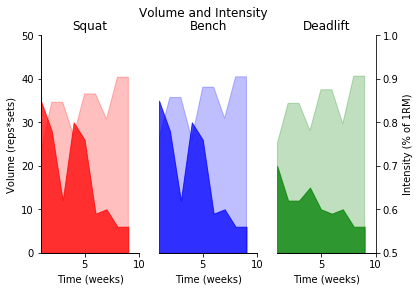

In [144]:
# Volume and intensity over time
plt.close()
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Squat
no_week = (np.int64(round(max(Squat[:,0]))))+1 
Vol = np.empty([1,no_week-1])
Int = np.empty([1,no_week-1])
x = range(1,no_week)

for i in range(1,no_week):
    temp = Squat[:,2]*Squat[:,3] #Volume temporary variable
    idx = Squat[:,0] == i
    Vol[0,i-1] = sum(temp[idx])
    Int[0,i-1] = max(Squat[idx,1])/Squat_1RM

ax12 = ax1.twinx()
ax1.stackplot(x,Vol,color='r',alpha=0.75)
ax12.stackplot(x,Int,color='r',alpha=0.25)

# Bench
no_week = (np.int64(round(max(Bench[:,0]))))+1 
Vol = np.empty([1,no_week-1])
Int = np.empty([1,no_week-1])
x = range(1,no_week)

for i in range(1,no_week):
    temp = Bench[:,2]*Bench[:,3] #Volume temporary variable
    idx = Bench[:,0] == i
    Vol[0,i-1] = sum(temp[idx])
    Int[0,i-1] = max(Bench[idx,1])/Bench_1RM

ax22 = ax2.twinx()
ax2.stackplot(x,Vol,color='b',alpha=0.75)
ax22.stackplot(x,Int,color='b',alpha=0.25)

# Deadlift
no_week = (np.int64(round(max(Deadlift[:,0]))))+1 
Vol = np.empty([1,no_week-1])
Int = np.empty([1,no_week-1])
x = range(1,no_week)

for i in range(1,no_week):
    temp = Deadlift[:,2]*Deadlift[:,3] #Volume temporary variable
    idx = Deadlift[:,0] == i
    Vol[0,i-1] = sum(temp[idx])
    Int[0,i-1] = max(Deadlift[idx,1])/Deadlift_1RM

ax32 = ax3.twinx()
ax3.stackplot(x,Vol,color='g',alpha=0.75)
ax32.stackplot(x,Int,color='g',alpha=0.25)
# general plot properties

f.suptitle('Volume and Intensity')

#ax1.plot(X,Vol, 'g-')
#ax2.plot(X,Int, 'b-')
ax1.set_title('Squat')
ax1.set_xlabel('Time (weeks)')
ax1.set_ylabel('Volume (reps*sets)')
ax1.set_xlim([1,10])
ax1.set_ylim([0,50])
ax12.set_ylim([.5,1])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
ax12.axes.get_yaxis().set_ticks([])

ax2.set_title('Bench')
ax2.set_xlabel('Time (weeks)')
ax2.set_xlim([1,10])
ax2.set_ylim([0,50])
ax22.set_ylim([.5,1])
ax2.axes.get_yaxis().set_ticks([])
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax22.axes.get_yaxis().set_ticks([]) #surely there is a way to do this programatically...
ax22.spines['right'].set_visible(False)
ax22.spines['left'].set_visible(False)
ax22.spines['top'].set_visible(False)

ax3.set_title('Deadlift')
ax3.set_xlabel('Time (weeks)')
ax3.set_xlim([1,10])
ax3.set_ylim([0,50])
ax32.set_ylim([.5,1])
ax3.axes.get_yaxis().set_ticks([])
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax32.axes.get_yaxis().set_ticks([])

ax32.spines['left'].set_visible(False)
ax32.spines['top'].set_visible(False)
ax32.set_ylabel('Intensity (% of 1RM)')

plt.show()

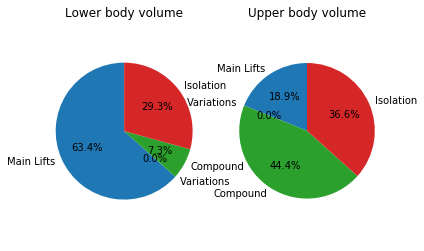

In [152]:
# pie plot of ALL volume (e.g., main lifts, 1,2,3)
plt.close()
f, (ax1,ax2) = plt.subplots(1,2)

# Lowerbody
# add squat sets.
no_week = (np.int64(round(max(Squat[:,0]))))+1 
pie_dat = np.zeros([no_week-1,4])

for i in range(1,no_week):
    idx = Squat[:,0] == i
    pie_dat[i-1,0] = sum(Squat[idx,2])

# add deadlift sets.
no_week = (np.int64(round(max(Deadlift[:,0]))))+1 

for i in range(1,no_week):
    idx = Deadlift[:,0] == i
    pie_dat[i-1,0] = pie_dat[i-1,0] + sum(Deadlift[idx,2])    
     
# other volume    
no_week = (np.int64(round(max(L_acc[:,0]))))+1 
for i in range(1,no_week):
    
    for j in range(1,4): # types of volume
        idx = np.logical_and(L_acc[:,0] == i,L_acc[:,2] == j)
        pie_dat[i-1,j] = sum(L_acc[idx,1])

ax1.set_title('Lower body volume')        
labels=['Main Lifts','Variations','Compound','Isolation']
ax1.pie((sum(pie_dat)),labels=labels,autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 


# Upperbody
no_week = (np.int64(round(max(Bench[:,0]))))+1 
pie_dat = np.zeros([no_week-1,4])

for i in range(1,no_week):
    idx = Bench[:,0] == i
    pie_dat[i-1,0] = sum(Bench[idx,2])
   
no_week = (np.int64(round(max(U_acc[:,0]))))+1 
for i in range(1,no_week):
    
    for j in range(1,4): # types of volume
        idx = np.logical_and(U_acc[:,0] == i,U_acc[:,2] == j)
        pie_dat[i-1,j] = sum(U_acc[idx,1])

ax2.set_title('Upper body volume')        
labels=['Main Lifts','Variations','Compound','Isolation']
ax2.pie((sum(pie_dat)),labels=labels,autopct='%1.1f%%', startangle=90)
ax2.axis('equal') 

plt.show()

In [146]:
#trend plot of all volume